## Heart Stroke Prediction

#### Problem Statement

This dataset helps us figure out if someone might have a stroke. It's a big deal because strokes are the second leading cause of death globally, making up about 11% of all deaths, according to the World Health Organization (WHO). The dataset looks at things like gender, age, different diseases, and whether someone smokes. Each row of data tells us important details about a person. By studying this information, we're trying to find patterns that can help predict who might be at risk for a stroke. The goal is to use this data to improve how we identify and manage factors that can lead to strokes, making healthcare more proactive and effective. The dataset contains +5.1k rows and 12 columns to explore!

#### Info about columns
- **id**: A unique identifier for each person.
- **gender**: Gender of the person.
- **age**: Age of the person.
- **hypertension**: 0 if the person doesn't have hypertension, 1 if the person has hypertension.
- **heart_disease**: 0 if the person doesn't have any heart diseases, 1 if the person has a heart disease.
- **ever_married**: Yes if the person is married, No otherwise.
- **work_type**: The type of occupation of the person.
- **Residence_type**: Area type of residence (Urban/ Rural).
- **avg_glucose_level**: Average glucose level in the blood of the person.
- **bmi**: Body mass index of the person.
- **smoking_status**: "formerly smoked", "never smoked", "smokes", "Unknown"*
- **stroke**: 1 if the person had a stroke or 0 if not.

 **Note**: "Unknown" in smoking_status means that the information is unavailable for this person.

In [1]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### Descriptive Analysis

In [2]:
# Reading data
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.drop(columns='id',inplace=True)

 we don't need id column ,so that drop id column

In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.shape

(5110, 11)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

we have 201 missing values in bmi column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [9]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
(df.isnull().sum()/df.shape[0])*100

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In bmi column there are approx 4% of missing value present in this column , so we use mean or median to impute missing values.

In [11]:
median_bmi = df['bmi'].median()
df['bmi'].fillna(median_bmi, inplace=True)

In [12]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

So there are no missing values in our dataset.

In [13]:
# converting float to int
df['age'] = df['age'].astype(int)
df['bmi']=df['bmi'].astype(int)

In [14]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,28,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25,formerly smoked,0


#### Checking unique value counts for all original object columns

In [15]:
df_cat = ['gender','ever_married','work_type','Residence_type','smoking_status']

In [16]:
df_num=['age','hypertension','heart_disease','avg_glucose_level','bmi','stoke']

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'hypertension'),
  Text(2, 0, 'heart_disease'),
  Text(3, 0, 'avg_glucose_level'),
  Text(4, 0, 'bmi'),
  Text(5, 0, 'stroke')])

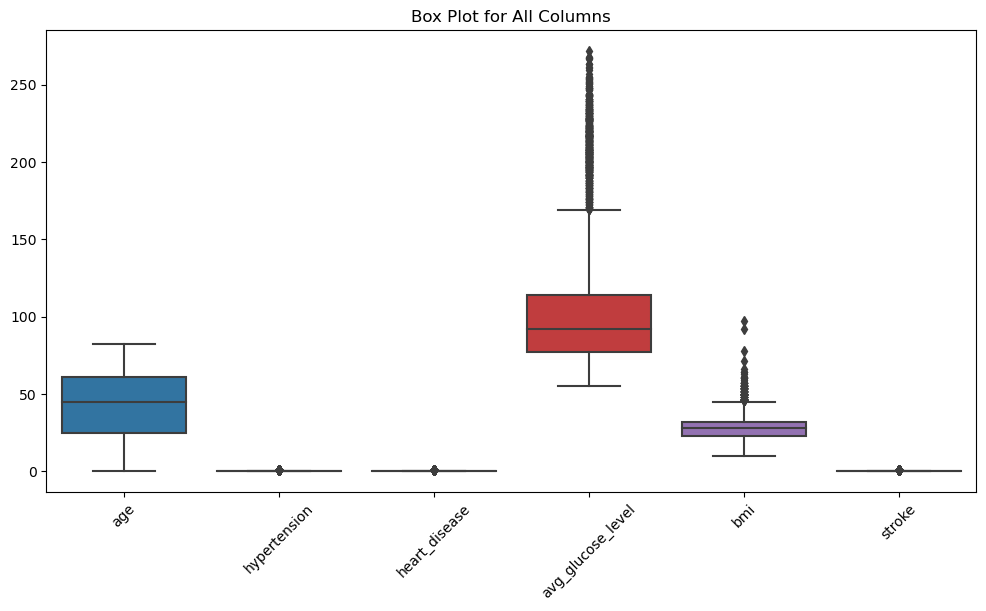

In [17]:
# Create a box plot for all columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Box Plot for All Columns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed


In [18]:
def outliers_per(col):
    Q1 = np.quantile(df[col],.25)
    Q3 = np.quantile(df[col],.75)
    IQR = Q3-Q1
    LL = Q1-(1.5*IQR)
    UL = Q3+(1.5*IQR)
    upper_count = df[df[col] > UL][col].count()
    upper_percentage = (upper_count/df.shape[0])*100
    lower_count = df[df[col] < LL][col].count()
    lower_percentage = (lower_count/df.shape[0])*100
    print('Outlier percentage of {col} upper range is {upper}% and lower range is {lower}%\n'.format(col=col,upper=round(upper_percentage,2),lower=round(lower_percentage,2)))
    return LL,UL

In [19]:
for i in df.select_dtypes(exclude='object').columns:
    outliers_per(i)

Outlier percentage of age upper range is 0.0% and lower range is 0.0%

Outlier percentage of hypertension upper range is 9.75% and lower range is 0.0%

Outlier percentage of heart_disease upper range is 5.4% and lower range is 0.0%

Outlier percentage of avg_glucose_level upper range is 12.27% and lower range is 0.0%

Outlier percentage of bmi upper range is 2.6% and lower range is 0.0%

Outlier percentage of stroke upper range is 4.87% and lower range is 0.0%



In [20]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,5110,3,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5110.0,NaN,NaN,NaN,43.215264,22.633866,0.0,25.0,45.0,61.0,82.0
hypertension,5110.0,NaN,NaN,NaN,0.097456,0.296607,0.0,0.0,0.0,0.0,1.0
heart_disease,5110.0,NaN,NaN,NaN,0.054012,0.226063,0.0,0.0,0.0,0.0,1.0
ever_married,5110,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,5110,5,Private,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,5110.0,NaN,NaN,NaN,106.147677,45.28356,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,NaN,NaN,NaN,28.43092,7.688483,10.0,23.0,28.0,32.0,97.0
smoking_status,5110,4,never smoked,1892,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Visualisation

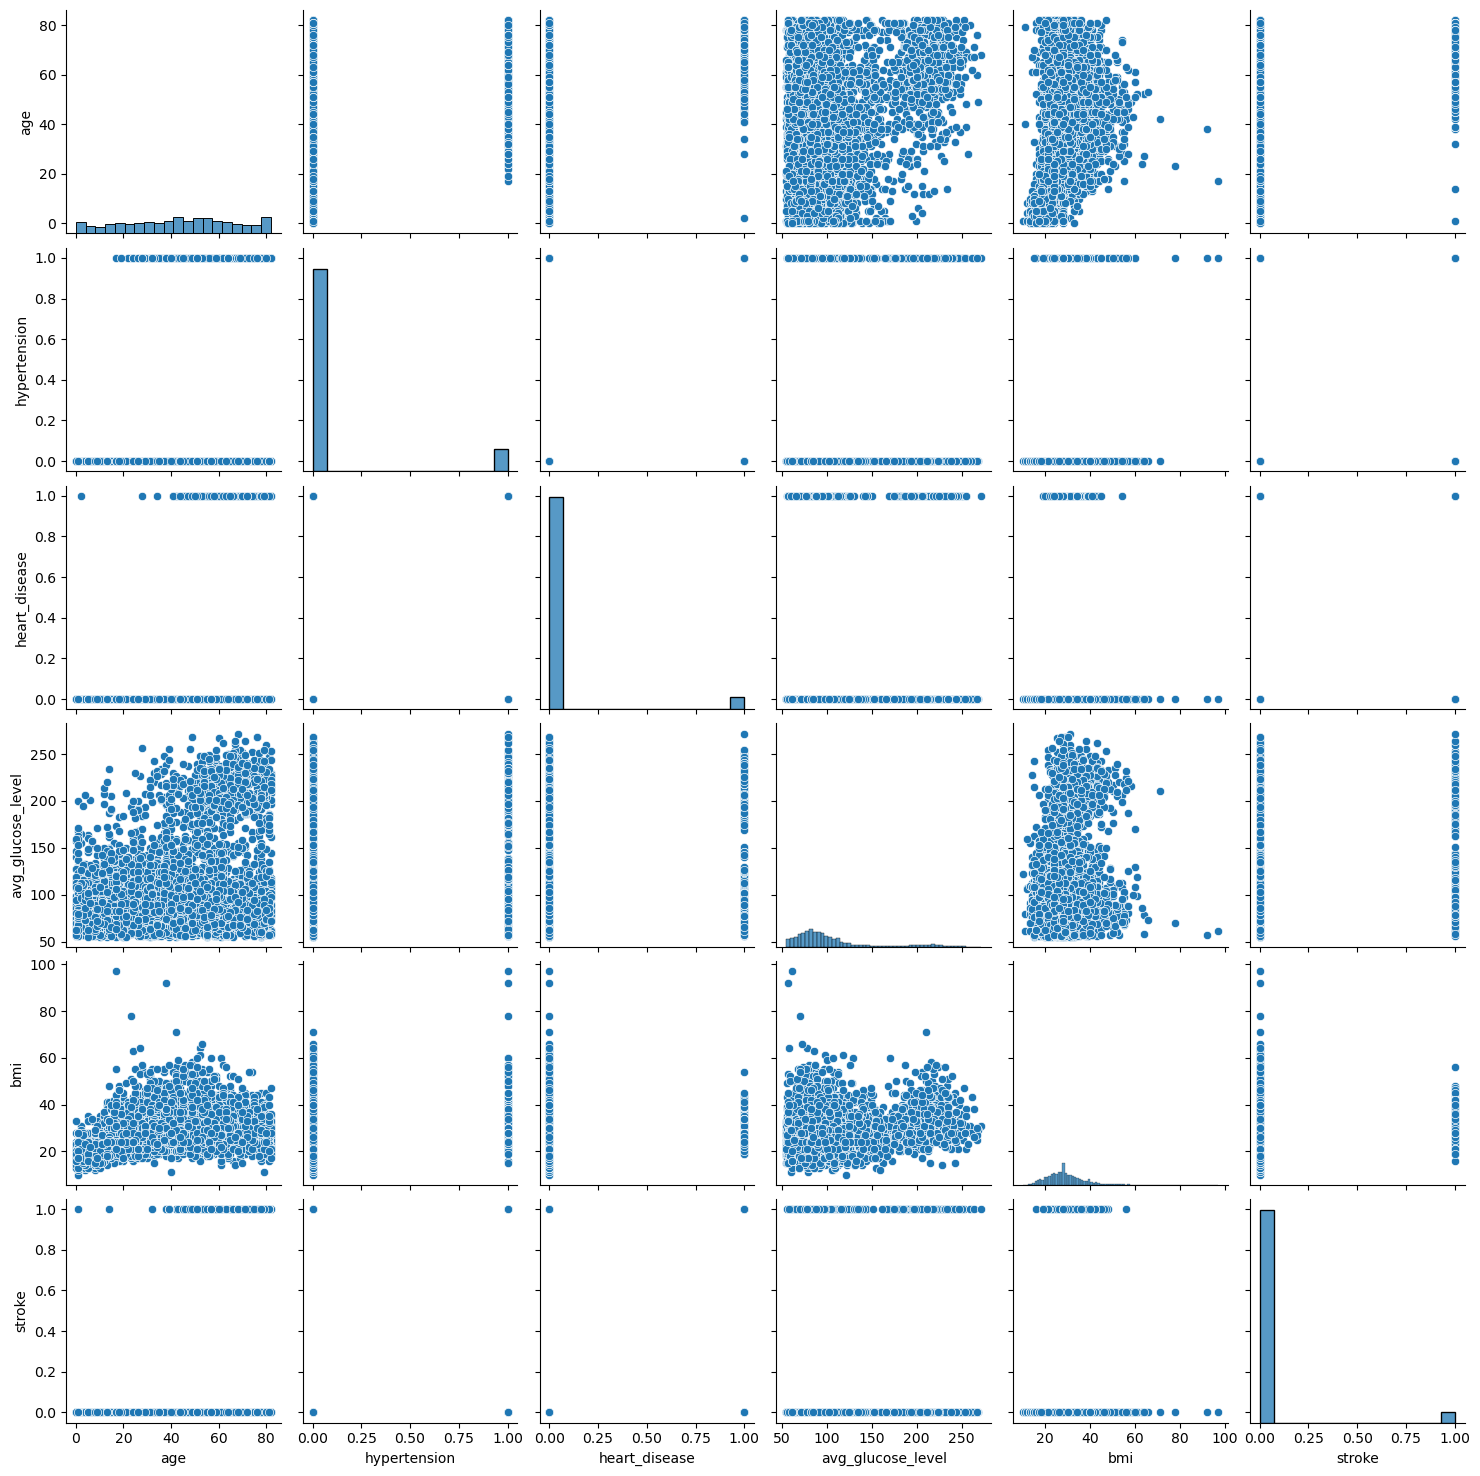

In [21]:
sns.pairplot(data=df)

I can't see any relation among the features

In [22]:
def uni_plot(columns):
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.histplot(data=df,x=columns,kde=True,bins=20)
    plt.title('Histogram of {}'.format(columns))
    plt.subplot(2,2,2)
    sns.boxplot(data=df,x=columns)
    plt.title('Boxplot of {}'.format(columns))
    plt.show()

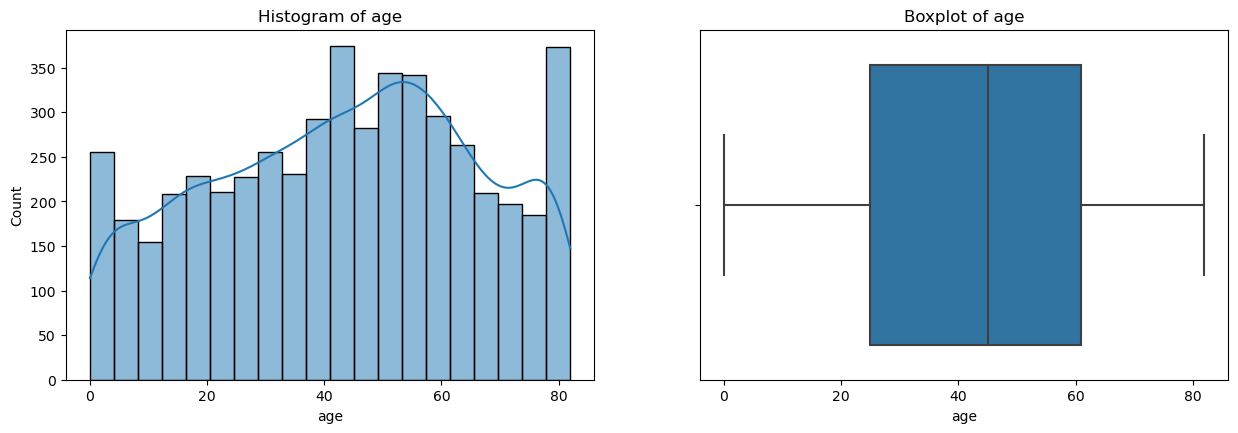

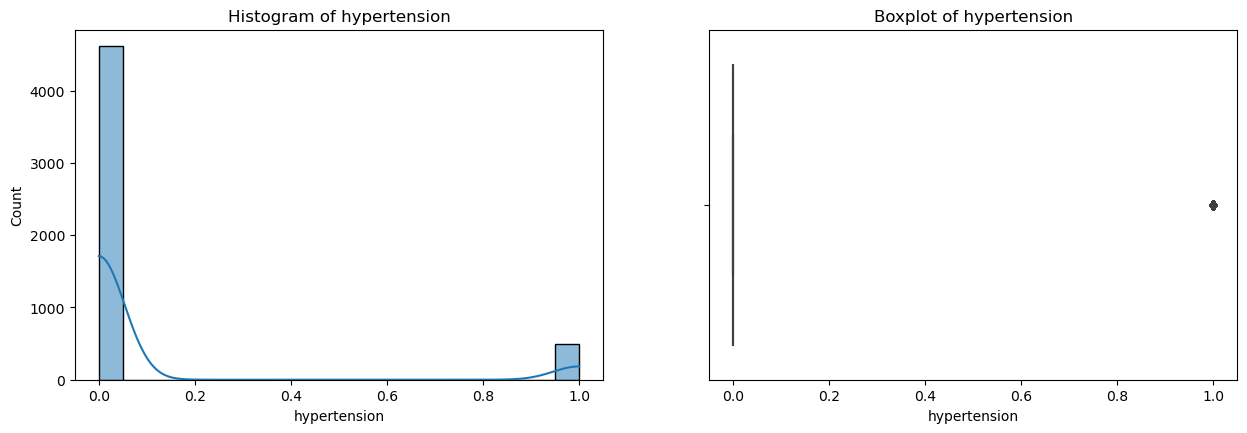

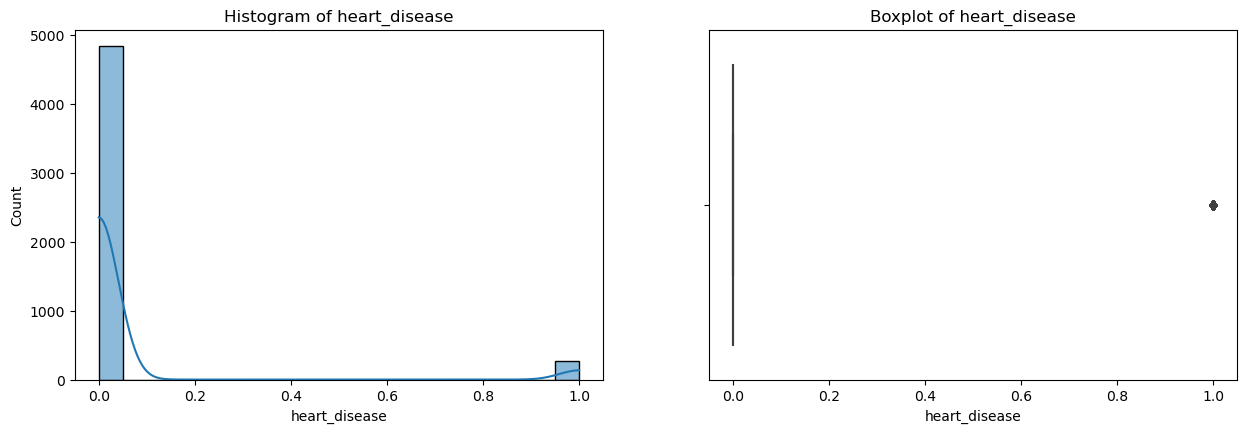

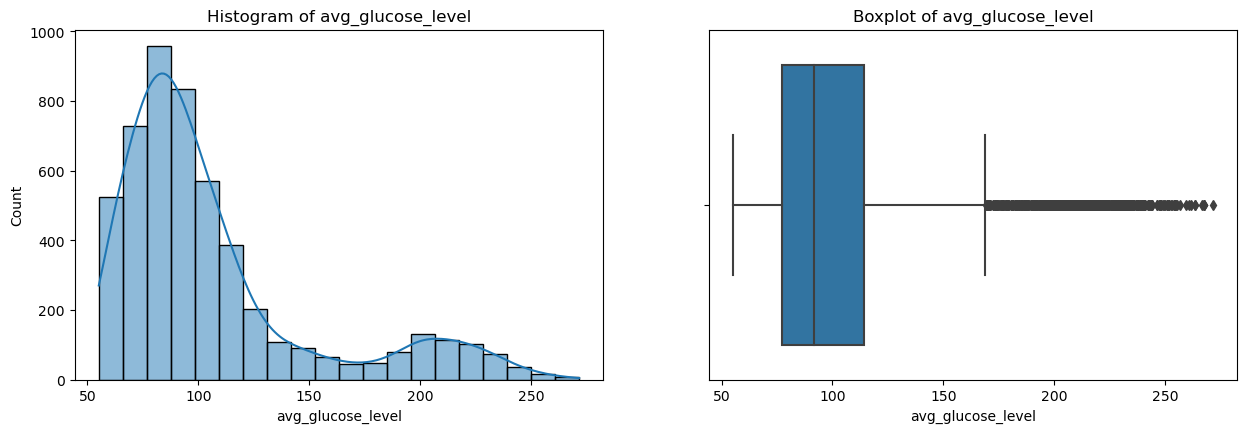

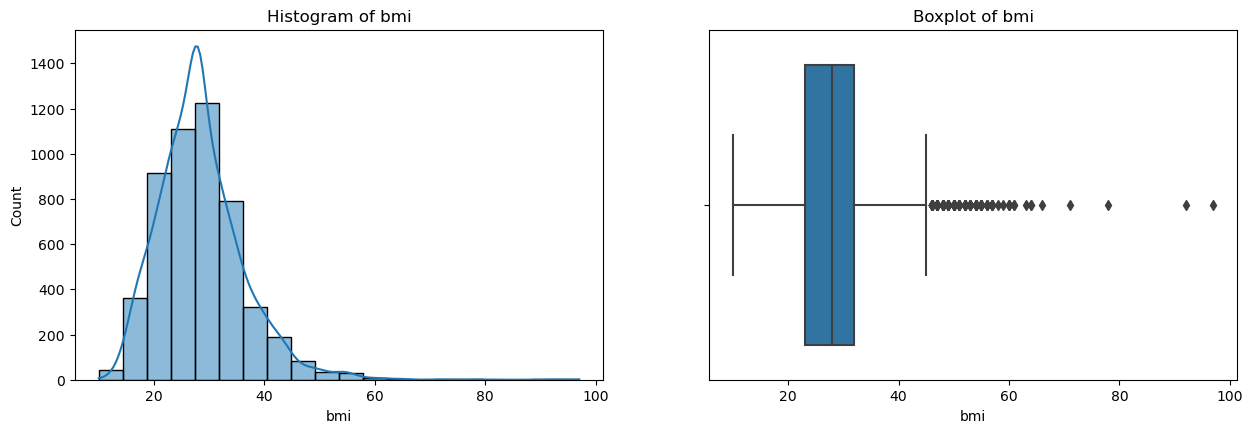

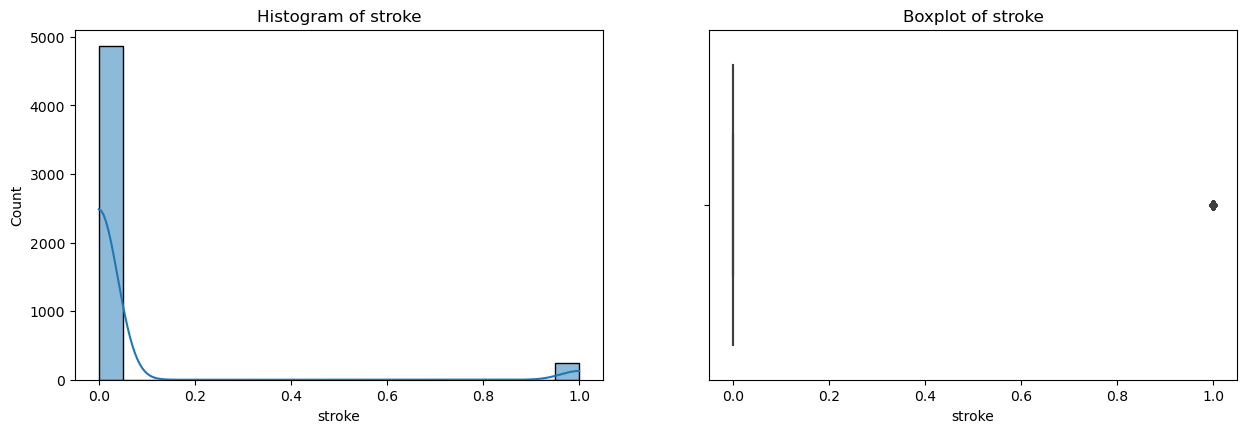

In [23]:
for i in df .select_dtypes(exclude='object'):
    uni_plot(i)

<Axes: xlabel='stroke', ylabel='age'>

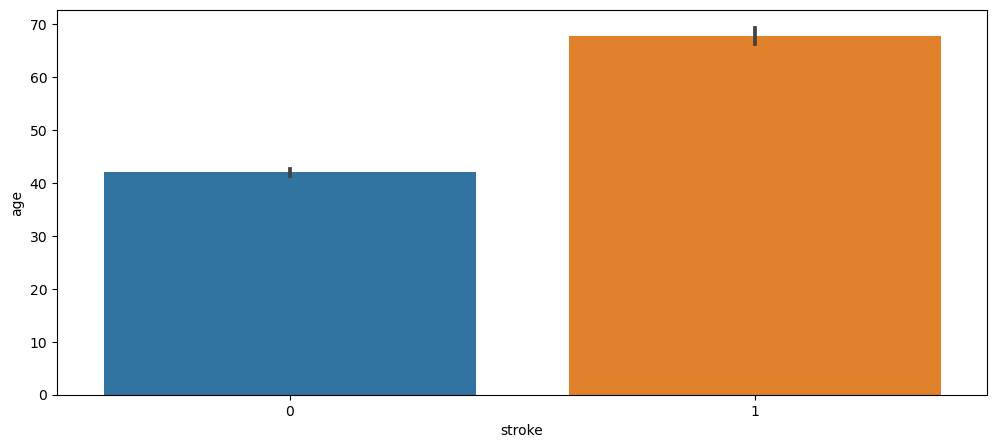

In [24]:
plt.figure(figsize=(12,5))
sns.barplot(data=df,y=df['age'], x=df['stroke'])

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])
df['ever_married'] = encoder.fit_transform(df['ever_married'])
df['work_type'] = encoder.fit_transform(df['work_type'])
df['Residence_type'] = encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = encoder.fit_transform(df['smoking_status'])

In [26]:
for col in df_cat:
    print(col.upper(),":",df[col].nunique())
    print(df[col].value_counts().sort_values(ascending=False))
    print('\n')

GENDER : 3
gender
0    2994
1    2115
2       1
Name: count, dtype: int64


EVER_MARRIED : 2
ever_married
1    3353
0    1757
Name: count, dtype: int64


WORK_TYPE : 5
work_type
2    2925
3     819
4     687
0     657
1      22
Name: count, dtype: int64


RESIDENCE_TYPE : 2
Residence_type
1    2596
0    2514
Name: count, dtype: int64


SMOKING_STATUS : 4
smoking_status
2    1892
0    1544
1     885
3     789
Name: count, dtype: int64




In [27]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36,1,1
1,0,61,0,0,1,3,0,202.21,28,2,1
2,1,80,0,1,1,2,0,105.92,32,2,1
3,0,49,0,0,1,2,1,171.23,34,3,1
4,0,79,1,0,1,3,0,174.12,24,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,1,2,1,83.75,28,2,0
5106,0,81,0,0,1,3,1,125.20,40,2,0
5107,0,35,0,0,1,3,0,82.99,30,2,0
5108,1,51,0,0,1,2,0,166.29,25,1,0


#### Splitting data into dependent and independent variables

In [28]:
from sklearn.model_selection import train_test_split
x = df.drop('stroke',axis=1)
y = df['stroke']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [30]:
x_train.shape

(3577, 10)

In [31]:
x_test.shape

(1533, 10)

In [32]:
y_train.shape

(3577,)

In [33]:
y_test.shape

(1533,)

#### Training the Logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

In [35]:
# Create a Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [36]:
# Make predictions on the test set
y_pred_LR = logistic_model.predict(x_test)
y_pred_LR

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_LR)
conf_mat

array([[1441,    3],
       [  88,    1]], dtype=int64)

In [38]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [39]:
# Breaking down the formula for Accuracy
lr_accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
lr_accuracy

0.9406392694063926

In [40]:
# Precison
lr_precision = true_positive/(true_positive+false_positive)
lr_precision

0.9979224376731302

In [41]:
# Recall
lr_recall = true_positive/(true_positive+false_negative)
lr_recall

0.9424460431654677

In [42]:
# F1 Score
lr_f1 = 2*(lr_recall * lr_precision) / (lr_recall + lr_precision)
lr_f1

0.9693911873528422

In [43]:
lr_training_score=logistic_model.score(x_train,y_train)
print("Training score :",lr_training_score)

Training score : 0.9544310875034946


In [44]:
lr_testing_score=logistic_model.score(x_test,y_test)
print("Testing score :",lr_testing_score)

Testing score : 0.9406392694063926


#### Training the Decision tree Model

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [47]:
# Make predictions on the test set
y_pred_dt = dt_classifier.predict(x_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_dt)
conf_mat

array([[1378,   66],
       [  70,   19]], dtype=int64)

In [49]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [50]:
# Accuracy
dt_accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print("Accuracy:", dt_accuracy)

Accuracy: 0.9112850619699935


In [51]:
# Precison
dt_precision = true_positive/(true_positive+false_positive)
dt_precision

0.9542936288088643

In [52]:
# Recall
dt_recall = true_positive/(true_positive+false_negative)
dt_recall

0.9516574585635359

In [53]:
# F1 Score
dt_f1 = 2*(dt_recall * dt_precision) / (dt_recall + dt_precision)
dt_f1

0.9529737206085753

In [54]:
dt_training_score = dt_classifier.score(x_train, y_train)
print("Training Score:", dt_training_score)

Training Score: 1.0


In [55]:
dt_testing_score = dt_classifier.score(x_test, y_test)
print("Testing Score:", dt_testing_score)

Testing Score: 0.9112850619699935


#### Training the SGD Classifier

In [56]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier()
sgd_classifier.fit(x_train, y_train)

SGDClassifier()

In [57]:
# Making predictions on test data
y_pred_sgd = sgd_classifier.predict(x_test)

In [58]:
y_pred_sgd

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_sgd)
conf_mat

array([[1444,    0],
       [  89,    0]], dtype=int64)

In [60]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [61]:
# Accuracy
sgd_accuracy=(true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
sgd_accuracy

0.9419439008480104

In [62]:
# Precision 
sgd_precision = true_positive/(true_positive+false_positive)
sgd_precision

1.0

In [63]:
# Recall
sgd_recall= true_positive/(true_positive+false_negative)
sgd_recall

0.9419439008480104

In [64]:
# F1 score
sgd_f1= 2*(sgd_recall*sgd_precision)/(sgd_recall+sgd_precision)
sgd_f1

0.970104131676184

In [65]:
sgd_training_score = sgd_classifier.score(x_train, y_train)
print("Training Score:", sgd_training_score)

Training Score: 0.9552697791445345


In [66]:
sgd_testing_score = sgd_classifier.score(x_train, y_train)
print("Testing Score:", sgd_testing_score)

Testing Score: 0.9552697791445345


#### Training the KNN Classifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier
kn_classifier = KNeighborsClassifier(n_neighbors = 23, metric = 'minkowski', p = 2)
kn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [68]:
# Making predictions on test data
y_pred_knn = kn_classifier.predict(x_test)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
#Confusion matrix
conf_mat = confusion_matrix(y_test,y_pred_knn)
conf_mat

array([[1444,    0],
       [  89,    0]], dtype=int64)

In [70]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [71]:
# Accuracy
kn_accuracy=(true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
kn_accuracy

0.9419439008480104

In [72]:
#Precision
kn_precision=true_positive/(true_positive+false_positive)
kn_precision

1.0

In [73]:
#Recall
kn_recall = true_positive/(true_positive+false_negative)
kn_recall

0.9419439008480104

In [74]:
# F1_Score
kn_f1=2*(kn_recall*kn_precision)/(kn_recall+kn_precision)
kn_f1

0.970104131676184

In [75]:
kn_training_score = kn_classifier.score(x_train, y_train)
print("Training Score:", kn_training_score)

Training Score: 0.9552697791445345


In [76]:
kn_testing_score = kn_classifier.score(x_test, y_test)
print("Testing Score:", kn_testing_score)

Testing Score: 0.9419439008480104


#### Training Random Forest Model

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [79]:
# Make predictions on the test set
y_pred_RF = rf_classifier.predict(x_test)
y_pred_RF

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
# confusion matrix
conf_mat=confusion_matrix(y_test,y_pred_RF)
conf_mat

array([[1443,    1],
       [  89,    0]], dtype=int64)

In [81]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [82]:
# Accuracy
rf_accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
rf_accuracy

0.9412915851272016

In [83]:
# Precision
rf_precision=true_positive/(true_positive+false_positive)
rf_precision

0.9993074792243767

In [84]:
# Recall
rf_recall=true_positive/(true_positive+false_negative)
rf_recall

0.9419060052219321

In [85]:
# F1_score
rf_f1=2*(rf_recall*rf_precision)/(rf_recall+rf_precision)
rf_f1

0.9697580645161291

In [86]:
rf_training_score = rf_classifier.score(x_train, y_train)
print("Training Score:", rf_training_score)

Training Score: 1.0


In [87]:
rf_testing_score = rf_classifier.score(x_test, y_test)
print("Testing Score:", rf_testing_score)

Testing Score: 0.9412915851272016


### FINAL CONCLUSIONS

In [88]:
Index=['Accuracy_Score','Precision_Score','Recall_Score','F1_Score','Train_Score','Test_Score']

In [89]:
conclusion = pd.DataFrame({'Logistic Regression_Model':[lr_accuracy,lr_precision,lr_recall,lr_f1,lr_training_score,lr_testing_score],
                           'DT_Model':[dt_accuracy,dt_precision,dt_recall,dt_f1,dt_training_score,dt_testing_score],
                           'SGD_Model':[sgd_accuracy,sgd_precision,sgd_recall,sgd_f1,sgd_training_score,sgd_testing_score],
                            'KNN_Model':[kn_accuracy,kn_precision,kn_recall,kn_f1,kn_training_score,kn_testing_score],
                            'Random Forest_Model':[rf_accuracy,rf_precision,rf_recall,rf_f1,rf_training_score,rf_testing_score],},index=Index)

In [90]:
summary_models=(round(conclusion,2))
summary_models

,Logistic Regression_Model,DT_Model,SGD_Model,KNN_Model,Random Forest_Model
Accuracy_Score,0.94,0.91,0.94,0.94,0.94
Precision_Score,1.00,0.95,1.00,1.00,1.00
Recall_Score,0.94,0.95,0.94,0.94,0.94
F1_Score,0.97,0.95,0.97,0.97,0.97
Train_Score,0.95,1.00,0.96,0.96,1.00
Test_Score,0.94,0.91,0.96,0.94,0.94


Given the nature of the problem and the dataset characteristics, **Logistic Regression** could be a good starting point due to its interpretability and effectiveness in binary classification tasks.

#### Testing on foreign data

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
sample_data = np.array([[1,45,0,1,1,3,1,171.23,34,2]])
sample_data = sc.transform(sample_data)

In [92]:
sample_data

array([[ 1.18418048,  0.07473239, -0.31719928,  4.17590042,  0.72617289,
         0.77896469,  0.9814414 ,  1.45762221,  0.72422552,  0.58170035]])

In [93]:
logistic_model.predict(sample_data)

array([0], dtype=int64)

In [94]:
dt_classifier.predict(sample_data)

array([0], dtype=int64)

In [95]:
sgd_classifier.predict(sample_data)

array([0], dtype=int64)

In [96]:
kn_classifier.predict(sample_data)

array([0], dtype=int64)

In [97]:
rf_classifier.predict(sample_data)

array([0], dtype=int64)